# ISKCON NLP Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sn
import warnings;
warnings.filterwarnings('ignore');

In [2]:
iskcon_raw = pd.read_csv('ISKCON.csv')
iskcon_raw['REVIEW DATE'] = pd.to_datetime(iskcon_raw['REVIEW DATE'])

# Feature Extraction

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
countvec = CountVectorizer()

In [16]:
countvec_dict = countvec.fit(iskcon_raw['text'])

In [17]:
len(countvec_dict.get_feature_names())

8754

In [18]:
countvec_dict.get_feature_names()[200:210]

['abondoned',
 'about',
 'above',
 'abroad',
 'abruptly',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed']

# Vectorize each sentence in to the feature set

In [22]:
review_vect = countvec.transform(iskcon_raw['text'])

In [23]:
type(review_vect)
#Convert the sparse matrix review_vect to an array and then to a dataframe
review_vect_df = pd.DataFrame(review_vect.toarray())

In [24]:
review_vect_df.shape
review_vect_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8744,8745,8746,8747,8748,8749,8750,8751,8752,8753
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#The columns do not have the titles , so we don't know which words were extracted
review_vect_df.columns = countvec_dict.get_feature_names()

In [28]:
review_vect_df.head(3)

,00,000,00am,00pm,04,05,07,080,10,100,...,zig,zigzag,zijn,zitten,zone,zoner,zoom,zou,zusätzliche,überall
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# See the vectorized form of the review
iskcon_raw[['REVIEW TYPE','text']][0:1]

,REVIEW TYPE,text
0,NEGATIVE,This reativly new temple was a big hindu versi...


In [30]:
review_vect_df[['new','temple','hindu','big','version']].iloc[0:1]
#.iloc[:,2:10]

,new,temple,hindu,big,version
0,1,3,1,1,1


In [31]:
#Check word/feature frequency. It will do column add for each word.
import numpy as np
feature_frequency = pd.DataFrame({'Feature':countvec_dict.get_feature_names(), 
                                  'Frequency': review_vect_df.sum()})

In [32]:
feature_frequency.sort_values(['Frequency'],ascending=1).head(5)

,Feature,Frequency
überall,überall,1
idiots,idiots,1
identify,identify,1
identified,identified,1
identification,identification,1


In [33]:
feature_frequency[feature_frequency['Frequency'] < 5].count()
#So we use min_df = 6

Feature      6466
Frequency    6466
dtype: int64

# Build Stopword list

In [34]:
from sklearn.feature_extraction import text

In [35]:
mystopwords =(list(text.ENGLISH_STOP_WORDS) + ['temple','place','krishna','bangalore','00','000','00 pm',
                                               '10','100','1000','11','12','12 30','15','15 minutes','15 pm',
                                               '16','1997','1pm','20','2013','2014','2015','2016','2017'])

In [36]:
len(list(text.ENGLISH_STOP_WORDS))
len(mystopwords)

343

# Create a new vectors using mystopwords

In [37]:
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download_gui()
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aloksmenthe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aloksmenthe/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
lemmatizer = WordNetLemmatizer()
# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(iskcon_raw['text'].iloc[1])
x = pd.DataFrame((lemmatizer.lemmatize(word,pos='v') for word in word_list))
#--
#lemmatizer.lemmatize('great',pos='a')   #Need to specify context of lemmatization using pos i.e verb, adjective, noun
def lemmatize (doc):
    word_list = nltk.word_tokenize(doc)
    lemmatized_words = [lemmatizer.lemmatize(word,pos='a') for word in word_list]
    #final_words = [word for word in lemmatized_words not in mystopwords]
    return lemmatized_words

### Stemming

In [40]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()    #Initialize an analyzer        

In [41]:
#Stemming is not part of sklearn so it is not an option in countvectorizer
def get_stemmed_words(doc):
    stemmed_words = [stemmer.stem(word) for word in analyzer(doc)]   #Analyzer(defined above) is taking each document, tokenizing it then stemming each of those words

    final_words = [word for word in stemmed_words if word not in mystopwords]
    
    return final_words

In [42]:
countvec_v2 = CountVectorizer(tokenizer=get_stemmed_words,
                              stop_words=mystopwords,
                              max_df=0.7,
                              min_df=6,
                             ngram_range=(1,2))

In [43]:
countvec_dict2 = countvec_v2.fit(iskcon_raw['text'])

In [44]:
len(countvec_dict2.get_feature_names())
#Features reduced from 8754 to 2906

2906

In [45]:
review_vect_v2 = countvec_dict2.transform(iskcon_raw['text']) #Convert data to vectors
type(review_vect_v2)

scipy.sparse.csr.csr_matrix

In [46]:
review_vect_v2_df = pd.DataFrame(countvec_dict2.transform(iskcon_raw['text']).toarray())

In [47]:
#Name the columns
review_vect_v2_df.columns = countvec_dict2.get_feature_names() 

In [48]:
review_vect_v2_df.head(5)

,108,108 step,108 time,25,2nd,30,30 pm,300,300 rupe,30pm,...,www,www tripadvisor,yashwantpur,ye,year,yeshwanthpur,yeshwantpur,yoga,young,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
feature_frequency[(feature_frequency['Feature'] == '000')]

,Feature,Frequency
000,000,6


In [50]:
review_vect_v2_df.shape

(4637, 2906)

In [51]:
total_cells = review_vect_v2_df.shape[0]*review_vect_v2_df.shape[1]
total_cells

13475122

In [52]:
not_null_cells = review_vect_v2.getnnz()
not_null_cells

93680

In [53]:
#Calculate sparsity of the matrix
print ('Total cells in the matrix: ', total_cells)
print ('% of not null cells', not_null_cells/total_cells*100 )

Total cells in the matrix:  13475122
% of not null cells 0.695207063802465


# Split Data Set

In [54]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [56]:
x_train, x_test, y_train, y_test = train_test_split(review_vect_v2_df, iskcon_raw['REVIEW TYPE'],train_size=0.7, random_state=42)

In [57]:
y_train.shape, x_train.shape,x_test.shape,y_test.shape

((3245,), (3245, 2906), (1392, 2906), (1392,))

In [58]:
print('Original dataset shape %s' % Counter(iskcon_raw['REVIEW TYPE']))

Original dataset shape Counter({'POSITIVE': 3998, 'MIXED': 277, 'NEGATIVE': 270, 'NEUTRAL': 92})


## Try SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=42)

In [63]:
x_res,y_res = sm.fit_resample(review_vect_v2_df, iskcon_raw['REVIEW TYPE'])

In [64]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'NEGATIVE': 3998, 'POSITIVE': 3998, 'MIXED': 3998, 'NEUTRAL': 3998})


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,train_size=0.7, random_state=42)

# Model Building

## 1. Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB  
#This is multiclass problem so using MultinomialNB

In [67]:
bayes_clf = MultinomialNB()

In [68]:
bayes_clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
y_pred = bayes_clf.predict(x_test)  # Predict on test data

###          Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
bayes_confusion_matrix = confusion_matrix(y_test,y_pred)

In [72]:
bayes_confusion_matrix

array([[ 428,  220,  520,   52],
       [  64,  758,  375,   24],
       [  30,   68, 1031,   35],
       [  57,   36,   77, 1023]])

In [73]:
bayes_confusion_matrix = confusion_matrix(y_test,y_pred,labels=['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL'])

In [74]:
bayes_confusion_matrix.view()

array([[ 758,   24,   64,  375],
       [  36, 1023,   57,   77],
       [ 220,   52,  428,  520],
       [  68,   35,   30, 1031]])

In [75]:
bayes_confusion_matrix.diagonal()

array([ 758, 1023,  428, 1031])

## Confusion Matrix and model accuracy score function

In [76]:
#Create a function to plot the confusion matrix heatmap. The input is a confusion matrix object created for various classifiers
def analyze_model(cm,test_val,pred_val):
    df_cm = pd.DataFrame(cm,
                    index=['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL'],
                    columns =['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL'])
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
    #Provide accuracy score
    from sklearn.metrics import accuracy_score
    print('The accuracy score is : ',accuracy_score(test_val,pred_val))
    print('')
    #Provide classification report of the predicted classes. 
    from sklearn.metrics import classification_report
    print ('Classification Report')
    print(classification_report(test_val, pred_val,target_names=['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL']))

The accuracy score is :  0.6752813672363485

Classification Report
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.35      0.48      1220
    POSITIVE       0.70      0.62      0.66      1221
       MIXED       0.51      0.89      0.65      1164
     NEUTRAL       0.90      0.86      0.88      1193

   micro avg       0.68      0.68      0.68      4798
   macro avg       0.71      0.68      0.67      4798
weighted avg       0.72      0.68      0.67      4798



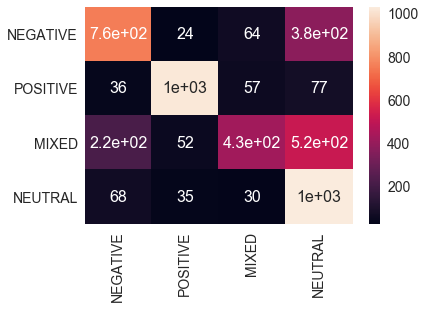

In [77]:
analyze_model(bayes_confusion_matrix,y_test,y_pred)

# One Vs Rest Classifier for multi class problem

In [78]:
from sklearn import metrics
from sklearn.metrics import coverage_error
from sklearn.multiclass import OneVsRestClassifier

## 1. MultinomialNB

In [79]:
OVR_MNB_clf= OneVsRestClassifier(MultinomialNB())
#We can use any underlying algorithm for OVR classifier e.g Naive Bayes, Loigstic etc.

In [80]:
OVR_MNB_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None)

In [81]:
y_pred_MNB = OVR_MNB_clf.predict(x_test)

In [82]:
#Create a data frame with test data labels and predicted labels.
y_pred_df = pd.DataFrame(y_test) 
y_pred_df['y_pred_MNB'] = y_pred_MNB 
y_pred_df.head(5)

,0,y_pred_MNB
0,NEUTRAL,NEUTRAL
1,MIXED,NEGATIVE
2,POSITIVE,POSITIVE
3,POSITIVE,POSITIVE
4,MIXED,MIXED


In [83]:
OVR_MNB_cm = confusion_matrix(y_test,y_pred_MNB)

The accuracy score is :  0.681117132138391

Classification Report
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.35      0.47      1220
    POSITIVE       0.70      0.61      0.65      1221
       MIXED       0.53      0.88      0.66      1164
     NEUTRAL       0.88      0.90      0.89      1193

   micro avg       0.68      0.68      0.68      4798
   macro avg       0.71      0.68      0.67      4798
weighted avg       0.71      0.68      0.67      4798



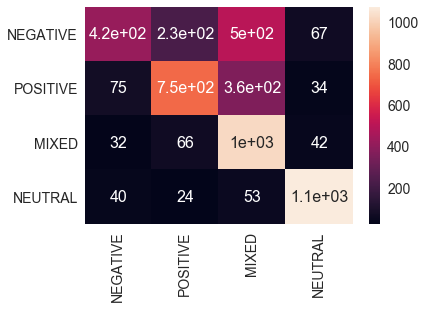

In [84]:
analyze_model(OVR_MNB_cm,y_test,y_pred_MNB)

## 2. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
OVR_LR_clf = OneVsRestClassifier(LogisticRegression())

In [87]:
OVR_LR_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [88]:
y_pred_LR = OVR_LR_clf.predict(x_test)

In [89]:
OVR_LR_cm = confusion_matrix(y_test,y_pred_LR)

The accuracy score is :  0.7000833680700291

Classification Report
              precision    recall  f1-score   support

    NEGATIVE       0.72      0.52      0.60      1220
    POSITIVE       0.77      0.60      0.68      1221
       MIXED       0.53      0.86      0.66      1164
     NEUTRAL       0.91      0.83      0.87      1193

   micro avg       0.70      0.70      0.70      4798
   macro avg       0.73      0.70      0.70      4798
weighted avg       0.73      0.70      0.70      4798



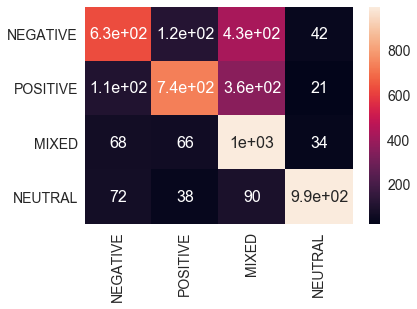

In [90]:
analyze_model(OVR_LR_cm,y_test,y_pred_LR)

## 3. Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
OVR_RF_clf = OneVsRestClassifier(RandomForestClassifier(class_weight="balanced"))

In [114]:
params_list_RF = {'n_estimators': [20,50],
               'criterion': ['gini','entropy'],
               'max_depth': [3,5],
               'max_features':[0.1,0.2]          #Can give in terms of absolute numbers, percentage, square root
              }

In [115]:
grid_search_RF = GridSearchCV(OVR_RF_clf,
                              param_grid = params_list_RF,
                              cv =5,                            
                              scoring='roc_auc')

In [116]:
print(grid_search_RF)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5], 'max_features': [0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)


In [117]:
OVR_RF_clf.get_params().keys()

dict_keys(['estimator__bootstrap', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [123]:
#grid_search_RF.fit(x_train,y_train)

In [119]:
OVR_RF_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          n_jobs=None)

In [120]:
y_pred_RF = OVR_RF_clf.predict(x_test)

In [121]:
OVR_RF_cm = confusion_matrix(y_test,y_pred_RF)

The accuracy score is :  0.795331388078366

Classification Report
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.73      0.75      1220
    POSITIVE       0.88      0.66      0.76      1221
       MIXED       0.67      0.92      0.78      1164
     NEUTRAL       0.91      0.88      0.89      1193

   micro avg       0.80      0.80      0.80      4798
   macro avg       0.81      0.80      0.80      4798
weighted avg       0.81      0.80      0.79      4798



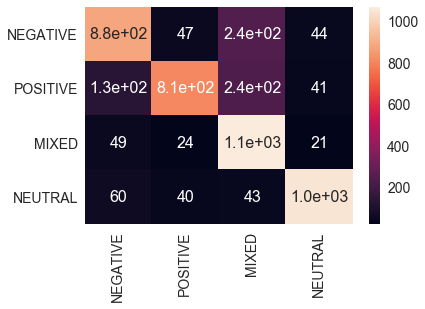

In [122]:
analyze_model(OVR_RF_cm,y_test,y_pred_RF)

## We have a winner ! RF with SMOTE performs the best as compared to other algorithms

In [130]:
print(OVR_RF_clf.)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
